In [3]:
import pandas as pd
from pathlib import Path

In [4]:
beers = pd.read_csv(Path.joinpath(Path.cwd().parent, 'data', 'beers.csv'))
beers.head()

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state
0,21st Amendment Brewery,21 Rock,American Double / Imperial IPA,9.7,2,4.00,San Francisco,CA
1,21st Amendment Brewery,21st Amendment IPA,American IPA,7.0,650,3.89,San Francisco,CA
2,21st Amendment Brewery,21st Amendment Imperial Stout,Russian Imperial Stout,10.0,4,3.88,San Francisco,CA
3,21st Amendment Brewery,21st Amendment Pale Ale,American Pale Ale (APA),5.5,7,3.86,San Francisco,CA
4,21st Amendment Brewery,5-South,American Pale Ale (APA),6.0,3,4.00,San Francisco,CA


In [5]:
## Quick EDA

In [6]:
beers['beer_style'].nunique()

98

In [8]:
# Most frequent?
beers['beer_style'].value_counts().head(5)

American IPA                      393
American Pale Ale (APA)           281
American Porter                   190
American Amber / Red Ale          184
American Double / Imperial IPA    173
Name: beer_style, dtype: int64

In [12]:
# Highest ABV?
beers.sort_values(by = 'beer_abv', ascending=False).head(5)

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state
293,Avery Brewing Company,The Beast Grand Cru 2004,Belgian Strong Dark Ale,18.10,40,3.04,Boulder,CO
190,Arctic Craft Brewery,Warning Sign Eisbock,Eisbock,18.00,4,4.00,Colorado Springs,CO
3612,Southampton Publick House,Double Ice Bock,Eisbock,18.00,22,4.14,Southampton,NY
292,Avery Brewing Company,The Beast Grand Cru,Belgian Strong Dark Ale,16.83,506,3.46,Boulder,CO
269,Avery Brewing Company,Mephistopheles' Stout,American Double / Imperial Stout,16.80,693,3.66,Boulder,CO


## Feature Engineering

In [13]:
# Let's identify beers with "double" in their name

In [22]:
# analyze a single cell
example_text = beers['beer_style'][1]
example_text

'American IPA'

In [19]:
# Write a function to identify if 'double' is in beer name
def double_trouble(row):
    if 'Double' in row:
        return 'trouble'
    else:
        return 'no trouble'

In [23]:
double_trouble(example_text)

'no trouble'

In [25]:
# here it comes!
beers['has_double'] = beers['beer_style'].apply(double_trouble)

In [26]:
beers.head()

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state,has_double
0,21st Amendment Brewery,21 Rock,American Double / Imperial IPA,9.7,2,4.00,San Francisco,CA,trouble
1,21st Amendment Brewery,21st Amendment IPA,American IPA,7.0,650,3.89,San Francisco,CA,no trouble
2,21st Amendment Brewery,21st Amendment Imperial Stout,Russian Imperial Stout,10.0,4,3.88,San Francisco,CA,no trouble
3,21st Amendment Brewery,21st Amendment Pale Ale,American Pale Ale (APA),5.5,7,3.86,San Francisco,CA,no trouble
4,21st Amendment Brewery,5-South,American Pale Ale (APA),6.0,3,4.00,San Francisco,CA,no trouble


In [27]:
# Write a function to identify if 'Ale' is in beer name
def ale_finder(row):
    if 'ale' in row.lower():
        return 1
    else:
        return 0

In [28]:
# here it comes!
beers['is_ale'] = beers['beer_style'].apply(ale_finder)
beers.head()

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state,has_double,is_ale
0,21st Amendment Brewery,21 Rock,American Double / Imperial IPA,9.7,2,4.00,San Francisco,CA,trouble,0
1,21st Amendment Brewery,21st Amendment IPA,American IPA,7.0,650,3.89,San Francisco,CA,no trouble,0
2,21st Amendment Brewery,21st Amendment Imperial Stout,Russian Imperial Stout,10.0,4,3.88,San Francisco,CA,no trouble,0
3,21st Amendment Brewery,21st Amendment Pale Ale,American Pale Ale (APA),5.5,7,3.86,San Francisco,CA,no trouble,1
4,21st Amendment Brewery,5-South,American Pale Ale (APA),6.0,3,4.00,San Francisco,CA,no trouble,1


In [30]:
# how many ales in the df?
beers['is_ale'].value_counts()

0    2876
1    1764
Name: is_ale, dtype: int64

## Generate Dummy Variables

In [32]:
# Let's shrink our dataset
beers2 = beers[['beer_style', 'beer_abv']]
print(beers2.shape)
beers2.head()

(4640, 2)


,beer_style,beer_abv
0,American Double / Imperial IPA,9.7
1,American IPA,7.0
2,Russian Imperial Stout,10.0
3,American Pale Ale (APA),5.5
4,American Pale Ale (APA),6.0


In [33]:
# "dummy" variables convert categories into 0/1 columns
# a.k.a. "one-hot encoding"

In [43]:
# Let's convert 'beer_style' into dummy columnsw
beer_dummies = pd.get_dummies(beers2, columns=['beer_style'], prefix='', prefix_sep='')
print(beer_dummies.shape)
print(len(beers['beer_style'].value_counts()))
beer_dummies.sample(5)

(4640, 99)
98


,beer_abv,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,...,Scotch Ale / Wee Heavy,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier
836,11.5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2652,6.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
721,5.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1101,11.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2205,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
beers['beer_style'][1056]

'Winter Warmer'

In [44]:
# How would we use use this?

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
y = beer_dummies['beer_abv']
X = beer_dummies.drop(['beer_abv'], axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [56]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred = linreg.predict(X_test)

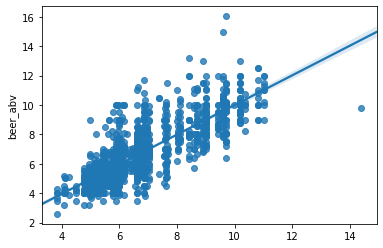

In [58]:
sns.regplot(x=y_pred, y=y_test)